In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
files.upload()




Saving TCS.NS.csv to TCS.NS.csv


{'TCS.NS.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-02-09,3195.000000,3245.800049,3164.000000,3176.899902,3142.987061,2658751\n2021-02-10,3185.000000,3219.399902,3157.300049,3213.300049,3178.998535,2127983\n2021-02-11,3215.000000,3219.300049,3185.050049,3206.000000,3171.776611,1165882\n2021-02-12,3184.199951,3245.500000,3182.000000,3190.800049,3156.739014,2777404\n2021-02-15,3209.000000,3209.000000,3131.550049,3139.850098,3106.332764,2630853\n2021-02-16,3150.000000,3167.649902,3100.000000,3108.800049,3075.614014,3435770\n2021-02-17,3105.100098,3132.850098,3045.550049,3073.100098,3040.295166,3678426\n2021-02-18,3065.000000,3097.899902,3031.000000,3057.350098,3024.713379,4189909\n2021-02-19,3058.000000,3087.149902,3016.149902,3071.850098,3039.058594,3725028\n2021-02-22,3096.000000,3096.000000,2943.149902,2958.449951,2926.868896,5366696\n2021-02-23,2970.000000,3028.000000,2968.000000,2980.199951,2948.386719,3832829\n2021-02-24,2972.000000,3003.350098,2921.149902,2948.100098,2

In [ ]:
df=pd.read_csv('TCS.NS.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df



,Date,Open,High,Low,Close,Adj Close,Volume
2021-02-09,2021-02-09,3195.000000,3245.800049,3164.000000,3176.899902,3142.987061,2658751
2021-02-10,2021-02-10,3185.000000,3219.399902,3157.300049,3213.300049,3178.998535,2127983
2021-02-11,2021-02-11,3215.000000,3219.300049,3185.050049,3206.000000,3171.776611,1165882
2021-02-12,2021-02-12,3184.199951,3245.500000,3182.000000,3190.800049,3156.739014,2777404
2021-02-15,2021-02-15,3209.000000,3209.000000,3131.550049,3139.850098,3106.332764,2630853
...,...,...,...,...,...,...,...
2022-02-02,2022-02-02,3827.899902,3864.000000,3800.649902,3856.199951,3856.199951,1984212
2022-02-03,2022-02-03,3851.000000,3882.500000,3816.050049,3824.600098,3824.600098,1960538
2022-02-04,2022-02-04,3815.300049,3824.699951,3769.000000,3814.899902,3814.899902,2307366
2022-02-07,2022-02-07,3791.000000,3831.800049,3756.149902,3779.000000,3779.000000,1919149


In [ ]:
def SMA(data,period=10,column='Close'):
  return data[column].rolling(window=period).mean()


df['SMA10']=SMA(df)

df


,Date,Open,High,Low,Close,Adj Close,Volume,SMA10
2021-02-09,2021-02-09,3195.000000,3245.800049,3164.000000,3176.899902,3142.987061,2658751,NaN
2021-02-10,2021-02-10,3185.000000,3219.399902,3157.300049,3213.300049,3178.998535,2127983,NaN
2021-02-11,2021-02-11,3215.000000,3219.300049,3185.050049,3206.000000,3171.776611,1165882,NaN
2021-02-12,2021-02-12,3184.199951,3245.500000,3182.000000,3190.800049,3156.739014,2777404,NaN
2021-02-15,2021-02-15,3209.000000,3209.000000,3131.550049,3139.850098,3106.332764,2630853,NaN
...,...,...,...,...,...,...,...,...
2022-02-02,2022-02-02,3827.899902,3864.000000,3800.649902,3856.199951,3856.199951,1984212,3784.834985
2022-02-03,2022-02-03,3851.000000,3882.500000,3816.050049,3824.600098,3824.600098,1960538,3775.830005
2022-02-04,2022-02-04,3815.300049,3824.699951,3769.000000,3814.899902,3814.899902,2307366,3774.664990
2022-02-07,2022-02-07,3791.000000,3831.800049,3756.149902,3779.000000,3779.000000,1919149,3769.214990


In [ ]:
def staterdy(df):

  buy=[]
  sell=[]
  flag=0
  buyprice=0
  #flag 0 means it is okay to buy
  for i in range(0,len(df)):
    if df['SMA10'][i]>df['Close'][i] and flag ==0:
      buy.append(df['Close'][i])
      sell.append(np.nan)
      buyprice=df['Close'][i]
      flag=1

    elif df['SMA10'][i]<df['Close'][i] and flag ==1 and buyprice<df['Close'][i]:
      sell.append(df['Close'][i])
      buy.append(np.nan)
      #we are selling so make buyprice 0 and change flag
      buyprice=0
      flag=0

    else:
      sell.append(np.nan)
      buy.append(np.nan)

  return (buy,sell)



In [ ]:
strat=staterdy(df)
df['Buy']=strat[0]
df['Sell']=strat[1]



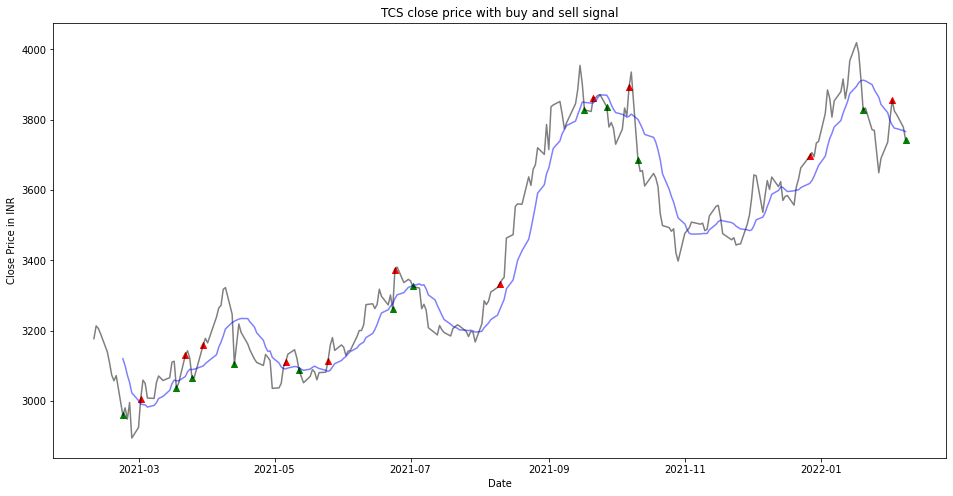

In [ ]:
#visualize the close price and buy and sell signal

plt.figure(figsize=(16,8))
plt.title('TCS close price with buy and sell signal')
plt.plot(df['Close'],alpha=0.5,label='CLOSE',color='black')
plt.plot(df['SMA10'],alpha=0.5,label='SMA10',color='blue')
plt.scatter(df.index,df['Buy'],color='green',label='Buy signal',marker='^',alpha=1)
plt.scatter(df.index,df['Sell'],color='red',label='Sell signal',marker='^',alpha=1)

plt.xlabel('Date')
plt.ylabel('Close Price in INR')

plt.show()


